In [0]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
import matplotlib.pyplot as plt 
from keras.utils import to_categorical
import numpy as np 

In [0]:
#unique class labels
print(len(np.unique(train_y)))

10


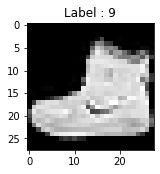

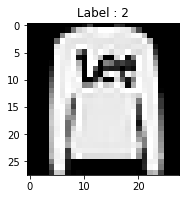

In [0]:
#displaying images 

plt.figure(figsize=(5,5))

plt.subplot(121)

plt.imshow(train_x[0,:],cmap='gray')
plt.title(f'Label : {train_y[0]}')
plt.show()


plt.subplot(122)

plt.imshow(test_x[1,:],cmap='gray')
plt.title(f'Label : {test_y[1]}')
plt.show()


## Data Preprocessing

In [0]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [0]:
print(train_x.shape,test_x.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [0]:
train_x = train_x/255.
test_x = test_x/255.

## OneHotEncoding (preprocessing labels)

In [0]:
y_train_one_hot = to_categorical(train_y)
y_test_one_hot = to_categorical(test_y)

In [0]:
print('original label:',train_y[0])
print('one_hot label :',y_train_one_hot[0])

original label: 9
one_hot label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Splitting data into train and validation 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_valid,train_label,valid_label = train_test_split(train_x,y_train_one_hot,test_size=0.2,random_state=1)

In [0]:
print(x_train.shape,x_valid.shape,train_label.shape,valid_label.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


## Model 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D,Dense,Flatten,Dropout  
from keras.layers.advanced_activations import LeakyReLU

In [0]:
clf = Sequential()

#Convolution  layer_1 
clf.add(Convolution2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1)))
clf.add(LeakyReLU(alpha=0.1))
clf.add(MaxPooling2D(pool_size=(2,2)))

#layer-2
clf.add(Convolution2D(64,kernel_size=(3,3),activation='linear'))
clf.add(LeakyReLU(alpha=0.1))
clf.add(MaxPooling2D(pool_size=(2,2)))

#layer-3
clf.add(Convolution2D(128,kernel_size=(3,3),activation='linear'))
clf.add(LeakyReLU(alpha=0.1))
clf.add(MaxPooling2D(pool_size=(2,2)))

#flatten layer
clf.add(Flatten())

#FeedForward layers

clf.add(Dense(128,activation='linear'))
clf.add(LeakyReLU(alpha=0.1))
clf.add(Dense(64,activation='linear'))
clf.add(LeakyReLU(alpha=0.1))
clf.add(Dense(32,activation='linear'))
clf.add(LeakyReLU(alpha=0.1))

#output layer 
clf.add(Dense(10,activation='softmax'))

Compiling Model 

In [0]:
clf.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [0]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

Training the Model 

In [0]:
model = clf.fit(x_train,train_label,batch_size=50,epochs=30,verbose=1,validation_data=(x_valid,valid_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/30





48000/48000 [==============================] - 26s 545us/step - loss: 0.6191 - acc: 0.7702 - val_loss: 0.4434 - val_acc: 0.8362
Epoch 2/30
48000/48000 [==============================] - 13s 272us/step - loss: 0.4110 - acc: 0.8502 - val_loss: 0.3908 - val_acc: 0.8524
Epoch 3/30
48000/48000 [==============================] - 13s 272us/step - loss: 0.3508 - acc: 0.8717 - val_loss: 0.3310 - val_acc: 0.8787
Epoch 4/30
48000/48000 [==============================] - 13s 271us/step - loss: 0.3134 - acc: 0.8819 - val_loss: 0.3261 - val_acc: 0.8769
Epoch 5/30
48000/48000 [==============================] - 13s 272us/step - loss: 0.2794 - acc: 0.8965 - val_loss: 0.3098 - val_acc: 0.8879
Epoch 6/30
48000/48000 [==============================] - 13s 270us/step - loss: 0.2584 - acc: 0.9044 - val_loss: 0.2849 - val_acc: 0.8995
Epoch 7/30
480

In [0]:
clf.evaluate(test_x,y_test_one_hot)

10000/10000 [==============================] - 1s 108us/step


[0.5581974759995937, 0.889]

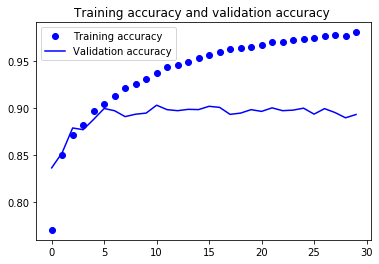

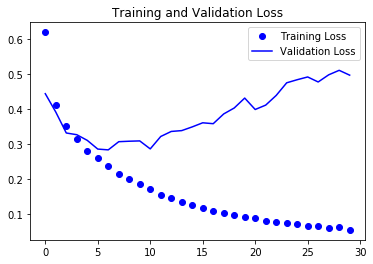

In [0]:
accuracy = model.history['acc']
val_acc = model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training accuracy and validation accuracy ')
plt.legend()
plt.figure()
#loss
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Adding Dropout to Network

In [0]:
clf2 = Sequential()
clf2.add(Convolution2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1)))
clf2.add(LeakyReLU(alpha=0.1))
clf2.add(MaxPooling2D(pool_size=(2,2)))
clf2.add(Dropout(0.25))

clf2.add(Convolution2D(64,(3,3),activation='linear'))
clf2.add(LeakyReLU(alpha=0.1))
clf2.add(MaxPooling2D(pool_size=(2,2)))
clf2.add(Dropout(0.25))


clf2.add(Convolution2D(128,(3,3),activation='linear'))
clf2.add(LeakyReLU(alpha=0.1))
clf2.add(MaxPooling2D(pool_size=(2,2)))
clf2.add(Dropout(0.3))

clf2.add(Flatten())

clf2.add(Dense(128,activation='linear'))
clf2.add(LeakyReLU(alpha=0.1))
clf2.add(Dropout(0.3))
clf2.add(Dense(10,activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
clf2.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [0]:
model_dropout = clf2.fit(x_train,train_label,batch_size=65,epochs=30,verbose=1,validation_data=(x_valid,valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 10s 213us/step - loss: 0.8069 - acc: 0.6986 - val_loss: 0.5080 - val_acc: 0.8081
Epoch 2/30
48000/48000 [==============================] - 9s 190us/step - loss: 0.5376 - acc: 0.8037 - val_loss: 0.4219 - val_acc: 0.8400
Epoch 3/30
48000/48000 [==============================] - 9s 191us/step - loss: 0.4647 - acc: 0.8330 - val_loss: 0.3792 - val_acc: 0.8588
Epoch 4/30
48000/48000 [==============================] - 9s 192us/step - loss: 0.4239 - acc: 0.8448 - val_loss: 0.3580 - val_acc: 0.8653
Epoch 5/30
48000/48000 [==============================] - 9s 189us/step - loss: 0.4013 - acc: 0.8548 - val_loss: 0.3358 - val_acc: 0.8747
Epoch 6/30
48000/48000 [==============================] - 9s 191us/step - loss: 0.3848 - acc: 0.8609 - val_loss: 0.3300 - val_acc: 0.8752
Epoch 7/30
48000/48000 [==============================] - 9s 190us/step - loss: 0.3704 - acc: 0.8632 - val_loss: 0.3164 -

In [0]:
clf2.evaluate(test_x,y_test_one_hot)

10000/10000 [==============================] - 1s 54us/step


[0.29484880625009535, 0.8918]

In [0]:
clf2.save('model.kb')

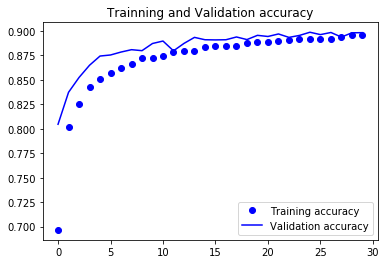

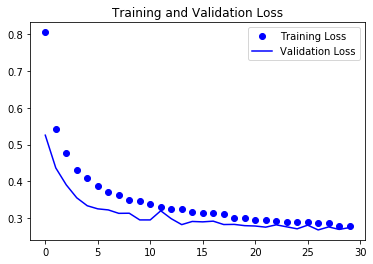

In [0]:
acc = model_dropout.history['acc']
val_acc = model_dropout.history['val_acc']
loss = model_dropout.history['loss']
valid_loss = model_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Trainning and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,valid_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Predict 

In [0]:
predict_labels = clf2.predict(test_x)

In [0]:
predict_labels

array([[4.31991376e-09, 7.51063378e-11, 2.47288266e-11, ...,
        3.21037194e-04, 2.92960856e-09, 9.99678135e-01],
       [1.39703654e-04, 1.50591627e-12, 9.99644279e-01, ...,
        3.97462468e-17, 7.48751631e-07, 1.19549469e-17],
       [1.85441029e-12, 1.00000000e+00, 5.88613021e-14, ...,
        8.95039981e-26, 5.76101666e-15, 3.11704221e-19],
       ...,
       [2.03858352e-08, 6.07321693e-11, 7.10090597e-11, ...,
        1.16873344e-10, 1.00000000e+00, 7.43613417e-12],
       [5.11465382e-13, 1.00000000e+00, 1.04174575e-14, ...,
        1.97662504e-26, 6.67073915e-17, 8.85884845e-20],
       [7.57313910e-06, 1.17907484e-06, 1.92094762e-06, ...,
        2.26240829e-02, 8.31479498e-04, 2.32370643e-04]], dtype=float32)

In [0]:
predicted_classes = np.argmax(np.round(predict_labels),axis=1)

Correctly classified 

found 8840 correct labels


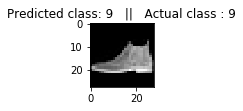

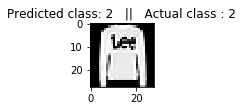

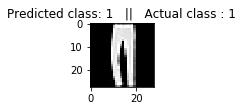

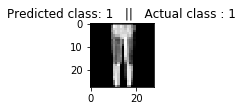

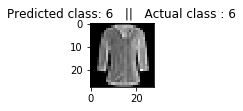

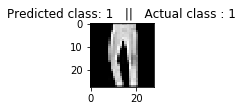

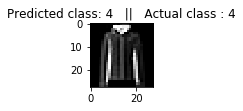

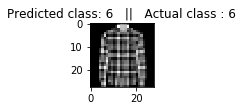

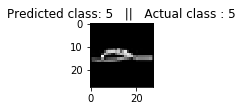

In [0]:
correct = np.where(predicted_classes == test_y)[0]
print(f'found {len(correct)} correct labels')

for i,correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_x[correct].reshape(28,28),cmap='gray')
  plt.title(f'Predicted class: {predicted_classes[correct]}   ||   Actual class : {test_y[correct]}')
  plt.show()

Incorrectly Classified

Incorrectly classified : 1160


Incorrectly classified : 1160


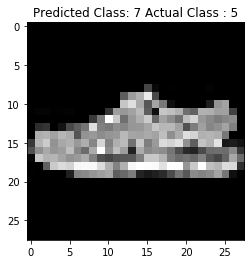

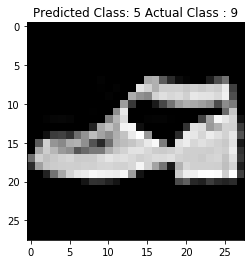

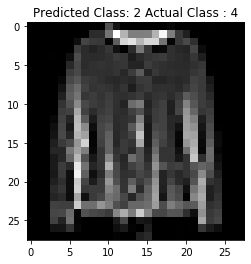

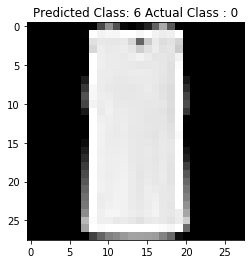

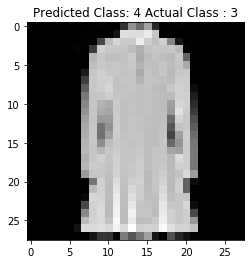

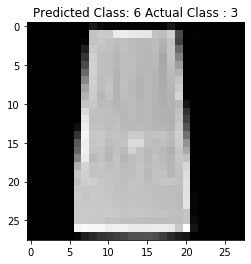

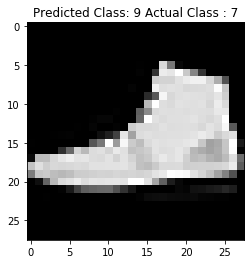

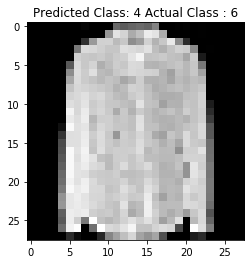

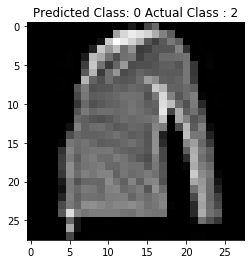

In [0]:
incorrect = np.where(predicted_classes != test_y)[0]
print(f'Incorrectly classified : {len(incorrect)}')
for i,incorrect in enumerate(incorrect[:9]):
  plt.imshow(test_x[incorrect].reshape(28,28),cmap='gray')
  plt.title(f'Predicted Class: {predicted_classes[incorrect]} Actual Class : {test_y[incorrect]}')
  plt.show()

Classification Report 

In [0]:
from sklearn.metrics import classification_report

In [0]:
targets = []

for i in range(10):
  a = 'class '+str(i)
  targets.append(a)

In [0]:
print(classification_report(test_y,predicted_classes,target_names=targets))

              precision    recall  f1-score   support

     class 0       0.68      0.92      0.78      1000
     class 1       0.99      0.97      0.98      1000
     class 2       0.81      0.87      0.84      1000
     class 3       0.94      0.86      0.90      1000
     class 4       0.81      0.83      0.82      1000
     class 5       0.98      0.96      0.97      1000
     class 6       0.80      0.54      0.65      1000
     class 7       0.96      0.95      0.95      1000
     class 8       0.98      0.96      0.97      1000
     class 9       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000

